In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import Random Forest Model regressor
from sklearn.ensemble import RandomForestRegressor
#Import Random Forest Model classifier
from sklearn.ensemble import RandomForestClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import seaborn as sns
pd.set_option('max_columns', None)
%matplotlib inline

In [3]:
# Open calendar data
boston_calendar = pd.read_csv("boston_airbnb_data/calendar.csv")
seattle_calendar = pd.read_csv("seattle_airbnb_data/calendar.csv")
# Open listings data
boston_listings = pd.read_csv("boston_airbnb_data/listings.csv")
seattle_listings = pd.read_csv("seattle_airbnb_data/listings.csv")

In [4]:
# Concatenate the data calendar from Boston and Seattle
df_calendar = pd.concat([boston_calendar,seattle_calendar ], axis=0,ignore_index=True)
# Drop price column because we don't need it for our analysis
df_calendar = df_calendar.drop('price', axis=1)
# Get one column for each variable on for t(true) and one for f(false)
df_calendar = pd.concat([df_calendar.drop('available', axis=1), pd.get_dummies(df_calendar['available'], prefix='available', prefix_sep='_')], axis=1)
# Group by each list id by adding the number of times each list_id is available and unavailable
df_occupation = df_calendar.groupby("listing_id").sum()
# Add a column with the occupancy percentage, which is the number of days occupied divided by the total number of days registered
df_occupation["occupation_percentage"] = df_occupation["available_f"]*100/(df_occupation["available_f"]+df_occupation["available_t"])
# Drop columns will no longer be used
df_occupation = df_occupation.drop(["available_f","available_t"], axis=1)
# Before concatenating listings dataframes, we need to remove the columns that have boston and not seattle
boston_listings = boston_listings.drop( ['access', 'interaction', 'house_rules'], axis=1)
# Concatenate the data listings from Boston and Seattle
df_listings = pd.concat([boston_listings, seattle_listings], axis=0)

In [5]:
# Create a consolidate dataframe with all the airbnb data including the ocupattion rate that wass alcasdflklasdf
df = pd.merge(df_listings, df_occupation,left_on="id",right_on="listing_id", how="inner")

In [6]:
df_boston = df[df["city"]=="Boston"]

In [7]:
columns_of_interest = ['occupation_percentage','property_type','room_type','accommodates','bathrooms','bedrooms','beds',
                       'bed_type']

df_boston = df_boston[columns_of_interest]
df_boston = df_boston.dropna()

In [9]:
cat_vars = df_boston.select_dtypes(include=['object']).copy().columns
for var in  cat_vars:
    # for each cat add dummy var, drop original column
    df_boston = pd.concat([df_boston.drop(var, axis=1), pd.get_dummies(df_boston[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)

In [10]:
df_boston

,occupation_percentage,accommodates,bathrooms,bedrooms,beds,property_type_Bed & Breakfast,property_type_Boat,property_type_Condominium,property_type_Dorm,property_type_Entire Floor,property_type_Guesthouse,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse,property_type_Villa,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
0,100.000000,4,1.5,2.0,3.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,1.643836,2,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,12.602740,2,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,73.150685,4,1.0,1.0,2.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
4,8.493151,2,1.5,1.0,2.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3533,100.000000,4,1.0,1.0,2.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
3534,98.904110,2,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3535,100.000000,2,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3559,0.000000,7,1.0,1.0,5.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [24]:
#Split data into an X matrix and a response vector y
y = df_boston['occupation_percentage']
x = df_boston.drop('occupation_percentage', axis=1)

# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [25]:
#Create a Gaussian Classifier
rf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 5, random_state = 18).fit(X_train, y_train)

#Train the model using the training sets y_pred=clf.predict(X_test)
rf.fit(x_train,y_train)

y_pred=rf.predict(x_test)

In [26]:
score = rf.score(x_train, y_train)
print("R-squared:", score) 

R-squared: 0.052145579343538695


In [27]:
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0)) 

MSE:  1490.4287886752563
RMSE:  745.2143943376282


c:\users\jordi\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\jordi\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


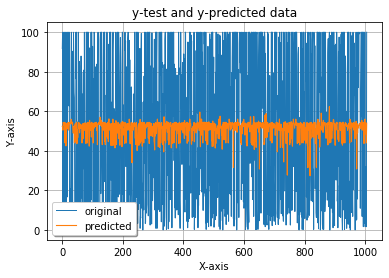

In [31]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [39]:
# transforma ouptput vatriable from continue to categorical
def percentage_to_categorical(value):
    value = float(value)
    if value <= 100 and value >= 80:
        return 5
    elif value < 80 and value >= 60:
        return 4
    elif value < 60 and value >= 40:
        return 3
    elif value < 40 and value >= 20:
        return 2
    elif value < 20 and value >= 0:
        return 1

In [51]:
df_boston_categorical = df_boston.copy()

In [52]:
df_boston_categorical["occupation_percentage"] = df_boston_categorical["occupation_percentage"].apply(percentage_to_categorical)

In [53]:
df_boston_categorical 

,occupation_percentage,accommodates,bathrooms,bedrooms,beds,property_type_Bed & Breakfast,property_type_Boat,property_type_Condominium,property_type_Dorm,property_type_Entire Floor,property_type_Guesthouse,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse,property_type_Villa,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
0,5,4,1.5,2.0,3.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,1,2,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,1,2,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,4,4,1.0,1.0,2.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
4,1,2,1.5,1.0,2.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3533,5,4,1.0,1.0,2.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
3534,5,2,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3535,5,2,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3559,1,7,1.0,1.0,5.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [55]:
#Split data into an X matrix and a response vector y
y = df_boston_categorical['occupation_percentage']
x = df_boston_categorical.drop('occupation_percentage', axis=1)

# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [57]:
#Create a Gaussian Classifier
rfc=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
rfc.fit(x_train,y_train)

y_pred=rfc.predict(x_test)

In [59]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.41451292246520877


In [69]:
feature_names = [f"feature {i}" for i in range(x.shape[1])]

In [71]:
list(x.columns)

['accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'property_type_Bed & Breakfast',
 'property_type_Boat',
 'property_type_Condominium',
 'property_type_Dorm',
 'property_type_Entire Floor',
 'property_type_Guesthouse',
 'property_type_House',
 'property_type_Loft',
 'property_type_Other',
 'property_type_Townhouse',
 'property_type_Villa',
 'room_type_Private room',
 'room_type_Shared room',
 'bed_type_Couch',
 'bed_type_Futon',
 'bed_type_Pull-out Sofa',
 'bed_type_Real Bed']

In [67]:
feature_names

['feature 0',
 'feature 1',
 'feature 2',
 'feature 3',
 'feature 4',
 'feature 5',
 'feature 6',
 'feature 7',
 'feature 8',
 'feature 9',
 'feature 10',
 'feature 11',
 'feature 12',
 'feature 13',
 'feature 14',
 'feature 15',
 'feature 16',
 'feature 17',
 'feature 18',
 'feature 19',
 'feature 20']

In [72]:
feature_importance = pd.Series(rfc.feature_importances_,index=list(x.columns)).sort_values(ascending=False)

In [73]:
feature_importance

accommodates                     0.264167
bathrooms                        0.182846
beds                             0.179283
bedrooms                         0.111592
property_type_House              0.053341
property_type_Condominium        0.042136
room_type_Private room           0.031340
bed_type_Real Bed                0.020580
property_type_Townhouse          0.017433
property_type_Loft               0.017289
property_type_Bed & Breakfast    0.014777
bed_type_Futon                   0.012675
bed_type_Pull-out Sofa           0.011359
room_type_Shared room            0.011350
property_type_Boat               0.008620
property_type_Other              0.007482
property_type_Villa              0.003626
bed_type_Couch                   0.003487
property_type_Guesthouse         0.003001
property_type_Entire Floor       0.002947
property_type_Dorm               0.000668
dtype: float64

No handles with labels found to put in legend.


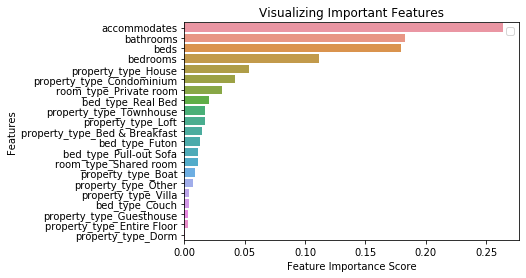

In [74]:
# Creating a bar plot
sns.barplot(x=feature_importance, y=feature_importance.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()